In [2]:
import scipy, random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(1283278)
%matplotlib inline

#set line width
mpl.rcParams['lines.linewidth'] = 4
#set font size for titles 
mpl.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
mpl.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
mpl.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
mpl.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
mpl.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
mpl.rcParams['ytick.major.size'] = 7
#set size of markers
mpl.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
mpl.rcParams['legend.numpoints'] = 1

p1    p2
0    0.04  0.54
1    0.12  0.56
2    0.12  0.48
3    0.06  0.44
4    0.10  0.54
5    0.06  0.56
6    0.08  0.44
7    0.04  0.48
8    0.08  0.48
9    0.06  0.64
10   0.08  0.50
11   0.00  0.46
12   0.08  0.50
13   0.12  0.48
14   0.04  0.54
15   0.06  0.46
16   0.12  0.42
17   0.10  0.40
18   0.06  0.48
19   0.08  0.48
20   0.08  0.48
21   0.10  0.46
22   0.08  0.52
23   0.06  0.58
24   0.10  0.54
25   0.02  0.60
26   0.06  0.48
27   0.04  0.42
28   0.14  0.46
29   0.12  0.38
..    ...   ...
420  0.14  0.36
421  0.12  0.50
422  0.12  0.52
423  0.08  0.64
424  0.08  0.58
425  0.06  0.44
426  0.02  0.56
427  0.06  0.56
428  0.16  0.42
429  0.04  0.48
430  0.02  0.58
431  0.06  0.62
432  0.10  0.42
433  0.10  0.46
434  0.12  0.42
435  0.02  0.42
436  0.06  0.68
437  0.06  0.48
438  0.04  0.48
439  0.02  0.56
440  0.08  0.48
441  0.02  0.58
442  0.02  0.56
443  0.06  0.60
444  0.06  0.58
445  0.08  0.54
446  0.06  0.56
447  0.08  0.46
448  0.06  0.50
449  0.06  0.58

[450 rows x 2 columns]

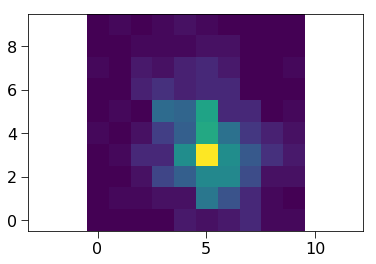

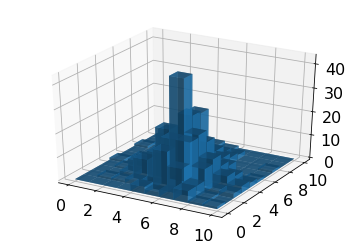

In [4]:
row1 = np.repeat(12, 30)
row2 = np.repeat(20, 20)
row = np.hstack((row1, row2))
A = np.array([row for _ in range(450)])

df1 = pd.DataFrame(A)
df1 = df1.applymap(lambda x: np.random.randint(1, x+1))
occ1 = df1.applymap(lambda x: 1 if x == 1 else 0).sum(axis=1)
occ2 = df1.applymap(lambda x: 1 if x % 2 == 0 else 0).sum(axis=1)
p = pd.DataFrame({'p1': occ1/50, 'p2': occ2/50})
sigmap = p.std(axis=0)
display(p)
hist, xedges, yedges = np.histogram2d(p['p1'],p['p2'], bins=10)

#p.plot.scatter(x='p1', y='p2')
fig1 = plt.figure()
plt.axis('equal')
plt.imshow(hist, interpolation='nearest', origin='low')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
xdata, ydata = np.meshgrid(np.arange(hist.shape[1]), np.arange(hist.shape[0]))
xdata = xdata.flatten()
ydata = ydata.flatten()
zdata = hist.flatten()
ax2.bar3d(xdata, ydata, np.zeros(len(zdata)), 1, 1, zdata, alpha=.7, cmap=plt.cm.jet)
plt.show()